In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dropout, MaxPooling2D, Flatten, Dense
from tensorflow.keras.constraints import MaxNorm
from tensorflow.keras.datasets.cifar10 import load_data

In [2]:
(X_train, y_train), (X_test, y_test) = load_data()

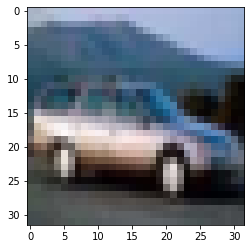

In [3]:
plt.imshow(X_train[4]/255)

In [4]:
X_train_scaled = X_train/255.0

In [5]:
X_test_scaled = X_test / 255.0

In [6]:
model = Sequential ([
    Conv2D(32,(3,3), input_shape =(32,32,3), padding ="same", activation ="relu", kernel_constraint=MaxNorm(3)),
    Dropout(0.3),
    Conv2D(32,(3,3), padding ='same', activation ='relu', kernel_constraint= MaxNorm(3)),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu' , kernel_constraint =MaxNorm(3)),
    Dropout(0.5),
    Dense(10,activation='sigmoid')
])

model.compile(optimizer ='adam',
             loss="sparse_categorical_crossentropy",
              metrics ='sparse_categorical_accuracy'
             )



In [8]:
model.fit(X_train_scaled,y_train,validation_data =(X_test_scaled, y_test), epochs =5, batch_size=32)

Epoch 1/5
1563/1563 [==============================] - 297s 190ms/step - loss: 1.4536 - sparse_categorical_accuracy: 0.4765 - val_loss: 1.2009 - val_sparse_categorical_accuracy: 0.5758
Epoch 2/5
1563/1563 [==============================] - 282s 180ms/step - loss: 1.1604 - sparse_categorical_accuracy: 0.5901 - val_loss: 1.0158 - val_sparse_categorical_accuracy: 0.6449
Epoch 3/5
1563/1563 [==============================] - 261s 167ms/step - loss: 1.0499 - sparse_categorical_accuracy: 0.6297 - val_loss: 0.9800 - val_sparse_categorical_accuracy: 0.6576
Epoch 4/5
1563/1563 [==============================] - 301s 192ms/step - loss: 0.9847 - sparse_categorical_accuracy: 0.6536 - val_loss: 0.9332 - val_sparse_categorical_accuracy: 0.6756
Epoch 5/5
1563/1563 [==============================] - 310s 198ms/step - loss: 0.9402 - sparse_categorical_accuracy: 0.6670 - val_loss: 0.9322 - val_sparse_categorical_accuracy: 0.6764


In [ ]:
labels= ["airplane ",
"automobile" ,
"bird ",
"cat ",
"deer ",
"dog ",
"frog ",
"horse ",
"ship ",
"truck "]

In [102]:
test=X_test[546]

In [103]:
p =model.predict(test.reshape(-1,32, 32, 3))

1/1 [==============================] - 0s 217ms/step


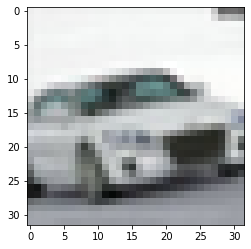

In [104]:
plt.imshow(test)

In [105]:
print(p[0])

[9.9999845e-01 1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 4.0304187e-17 0.0000000e+00]


In [106]:
len(p[0])

10

In [107]:
from numpy import argmax

In [108]:
labels[p[0].argmax()]

'automobile'

In [32]:
X_test[1].shape

(32, 32, 3)

In [46]:
X_test[1].reshape(-1,32, 32, 3).shape

(1, 32, 32, 3)

In [109]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 512)               4194816   
                                                        

In [110]:
Conv2D(32, (3,3), input_shape=(32, 32, 3), padding="same", activation="relu", kernel_constraint=MaxNorm(3))

In [112]:
print(model.layers[0].kernel)

<tf.Variable 'conv2d/kernel:0' shape=(3, 3, 3, 32) dtype=float32, numpy=
array([[[[-1.01615302e-01, -5.75859137e-02,  2.36545950e-02,
           1.00066923e-01,  3.10444385e-01,  2.73667816e-02,
          -2.28752136e-01,  3.49069864e-01, -1.37054576e-02,
           1.19461678e-01,  2.01884776e-01,  2.40856141e-01,
           1.64682046e-01,  6.87877880e-03,  3.26153874e-01,
          -1.39276594e-01, -5.04595088e-03,  7.80699179e-02,
          -1.26473382e-01,  4.53703970e-01,  2.49219444e-02,
          -2.71138728e-01,  6.65960491e-01, -2.02685848e-01,
          -1.58135429e-01,  4.01965119e-02, -1.36960879e-01,
          -9.74296257e-02,  7.00936913e-02, -3.32921028e-01,
          -1.00879394e-01, -1.28179416e-01],
         [-9.88952219e-02, -1.04796970e-02,  2.30559349e-01,
           3.05347502e-01, -1.76875934e-01, -1.87599406e-01,
          -2.01042935e-01, -3.42522651e-01, -1.49725184e-01,
           3.60602081e-01,  9.93105844e-02,  3.13487947e-01,
           1.23452991e-01,  

In [113]:
model.layers[0].kernel.shape

TensorShape([3, 3, 3, 32])

In [9]:
#EXtract FEATURES

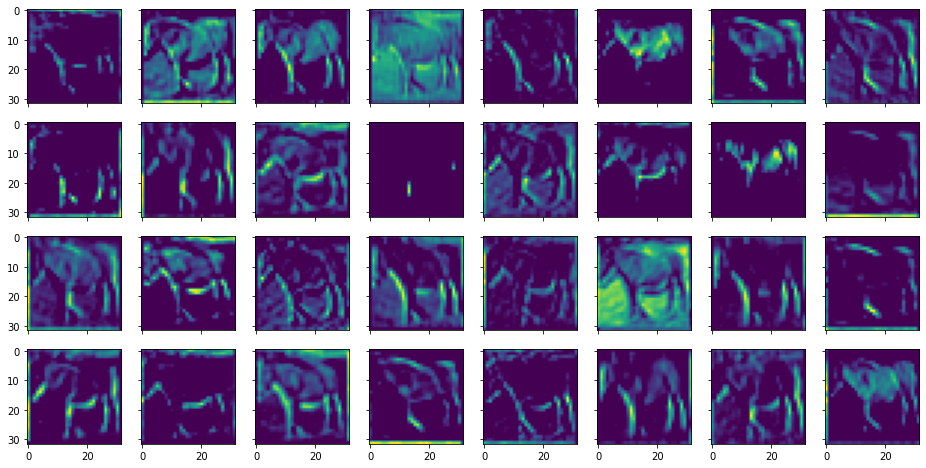

In [10]:
# Extract output from each layer
extractor = tf.keras.Model(inputs=model.inputs,
                           outputs=[layer.output for layer in model.layers])
features = extractor(np.expand_dims(X_train[7], 0))

# Show the 32 feature maps from the first layer
l0_features = features[0].numpy()[0]

fig, ax = plt.subplots(4, 8, sharex=True, sharey=True, figsize=(16,8))
for i in range(0, 32):
    row, col = i//8, i%8
    ax[row][col].imshow(l0_features[..., i])

plt.show()

In [11]:
extractor = tf.keras.Model(inputs=model.inputs,
                           outputs=[layer.output for layer in model.layers])

In [12]:
[layer.output for layer in model.layers]

[<KerasTensor: shape=(None, 32, 32, 32) dtype=float32 (created by layer 'conv2d')>,
 <KerasTensor: shape=(None, 32, 32, 32) dtype=float32 (created by layer 'dropout')>,
 <KerasTensor: shape=(None, 32, 32, 32) dtype=float32 (created by layer 'conv2d_1')>,
 <KerasTensor: shape=(None, 16, 16, 32) dtype=float32 (created by layer 'max_pooling2d')>,
 <KerasTensor: shape=(None, 8192) dtype=float32 (created by layer 'flatten')>,
 <KerasTensor: shape=(None, 512) dtype=float32 (created by layer 'dense')>,
 <KerasTensor: shape=(None, 512) dtype=float32 (created by layer 'dropout_1')>,
 <KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'dense_1')>]

In [132]:
X_train[7].reshape(-1,32, 32, 3).shape

(1, 32, 32, 3)

In [130]:
np.expand_dims(X_train[7], 0).shape

(1, 32, 32, 3)

In [195]:
extractor(np.expand_dims(X_train[7], 0))[0].shape

TensorShape([1, 32, 32, 32])

In [133]:
extractor(X_train[7].reshape(-1,32, 32, 3))

[<tf.Tensor: shape=(1, 32, 32, 32), dtype=float32, numpy=
 array([[[[  0.        ,   0.        ,   0.        , ...,   0.        ,
             0.        ,  27.83129   ],
          [  0.        ,   0.        ,   0.        , ...,   0.        ,
             0.        ,  21.587454  ],
          [  0.        ,   0.        ,   0.        , ...,   0.        ,
             0.        ,  17.310644  ],
          ...,
          [  0.        ,   0.        ,   0.        , ...,  13.51711   ,
             0.        ,   0.        ],
          [  0.        ,   0.        ,   0.        , ...,  13.926703  ,
             0.        ,   0.        ],
          [  0.        ,   0.        ,   0.        , ...,  22.11014   ,
            52.730362  ,  13.581624  ]],
 
         [[  0.        ,   0.        ,  12.611755  , ...,   0.        ,
             0.        ,  36.892876  ],
          [  0.        ,  13.881113  ,   0.        , ...,   0.        ,
             0.        ,  20.210014  ],
          [  0.        ,  33

In [213]:
extractor(np.expand_dims(X_train[7], 0))

[<tf.Tensor: shape=(1, 32, 32, 32), dtype=float32, numpy=
 array([[[[  0.        ,   0.        ,   0.        , ...,   0.        ,
             0.        ,  27.83129   ],
          [  0.        ,   0.        ,   0.        , ...,   0.        ,
             0.        ,  21.587454  ],
          [  0.        ,   0.        ,   0.        , ...,   0.        ,
             0.        ,  17.310644  ],
          ...,
          [  0.        ,   0.        ,   0.        , ...,  13.51711   ,
             0.        ,   0.        ],
          [  0.        ,   0.        ,   0.        , ...,  13.926703  ,
             0.        ,   0.        ],
          [  0.        ,   0.        ,   0.        , ...,  22.11014   ,
            52.730362  ,  13.581624  ]],
 
         [[  0.        ,   0.        ,  12.611755  , ...,   0.        ,
             0.        ,  36.892876  ],
          [  0.        ,  13.881113  ,   0.        , ...,   0.        ,
             0.        ,  20.210014  ],
          [  0.        ,  33

In [137]:
img_example=X_train[7]

In [139]:
features = extractor(np.expand_dims(img_example,0))

In [140]:
l0_features = features[0].numpy()[0]

In [144]:
l0_features.shape

(32, 32, 32)

In [146]:
import cv2

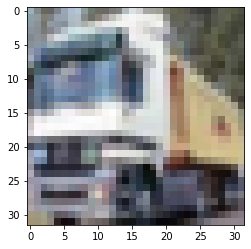

In [179]:
plt.imshow(X_train[1])

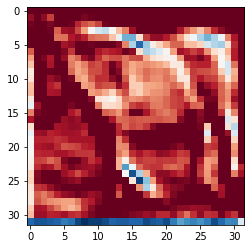

In [199]:
plt.imshow(l0_features[..., 2],cmap="RdBu")

In [ ]:
cv2.COLOR_HLS2RGB 

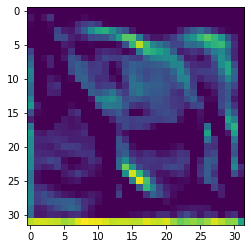

In [188]:
plt.imshow(l0_features[..., 2])

In [191]:
l0_features[..., 2].shape

(32, 32)

In [190]:
cv2.cvtColor(l0_features[..., 2], cv2.COLOR_HSV2RGB_FULL )

error: OpenCV(4.5.5) /Users/runner/work/opencv-python/opencv-python/opencv/modules/imgproc/src/color.simd_helpers.hpp:92: error: (-2:Unspecified error) in function 'cv::impl::(anonymous namespace)::CvtHelper<cv::impl::(anonymous namespace)::Set<3, -1, -1>, cv::impl::(anonymous namespace)::Set<3, 4, -1>, cv::impl::(anonymous namespace)::Set<0, 5, -1>, cv::impl::(anonymous namespace)::NONE>::CvtHelper(cv::InputArray, cv::OutputArray, int) [VScn = cv::impl::(anonymous namespace)::Set<3, -1, -1>, VDcn = cv::impl::(anonymous namespace)::Set<3, 4, -1>, VDepth = cv::impl::(anonymous namespace)::Set<0, 5, -1>, sizePolicy = cv::impl::(anonymous namespace)::NONE]'
> Invalid number of channels in input image:
>     'VScn::contains(scn)'
> where
>     'scn' is 1


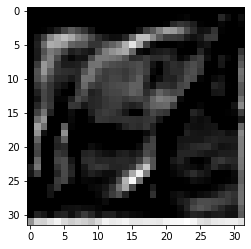

In [178]:
plt.imshow(l0_features[...,::-1, 2], cmap='gray')

In [203]:
pwd

'/Users/user/Desktop/MMAI assignments/DeepLearning'

In [15]:
import cv2

In [241]:
test_image= plt.imread('../nlp/test_image.png')

In [242]:
test_image2 = cv2.resize(test_image, (32,32), interpolation = cv2.INTER_AREA)

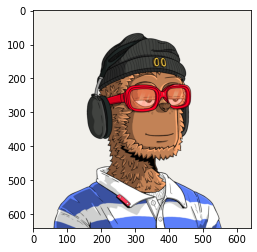

In [244]:
plt.imshow(test_image)

In [36]:
test_image2 =cv2.cvtColor(test_image2, cv2.COLOR_RGBA2RGB )

In [37]:
test_image2.shape

(32, 32, 3)

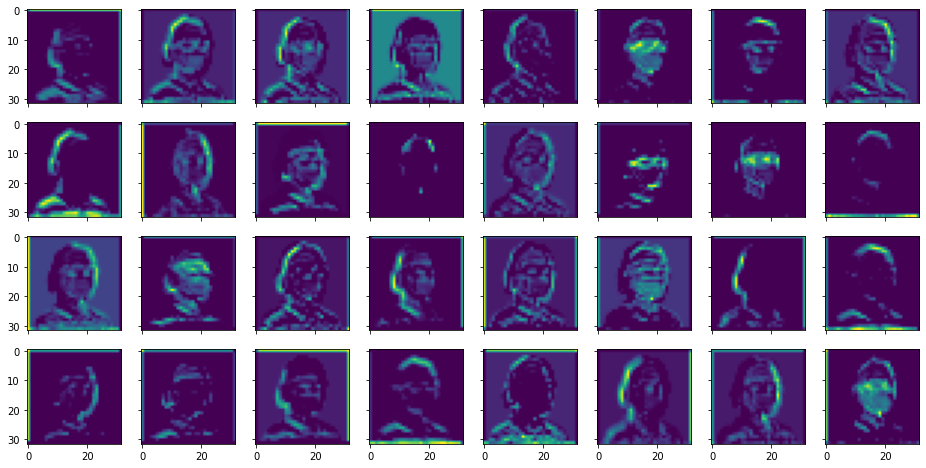

In [38]:
features = extractor(np.expand_dims(test_image2, 0))

# Show the 32 feature maps from the first layer
l0_features = features[0].numpy()[0]

fig, ax = plt.subplots(4, 8, sharex=True, sharey=True, figsize=(16,8))
for i in range(0, 32):
    row, col = i//8, i%8
    ax[row][col].imshow(l0_features[..., i])

plt.show()

In [42]:
pwd

'/Users/user/Desktop/MMAI assignments/DeepLearning'

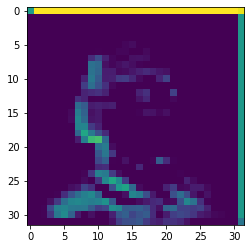

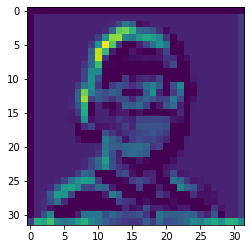

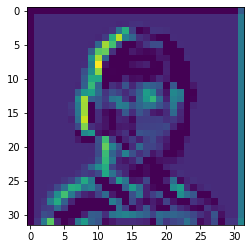

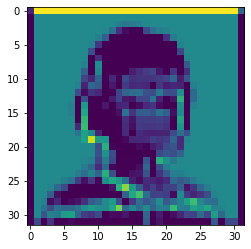

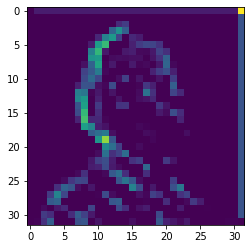

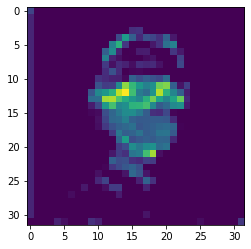

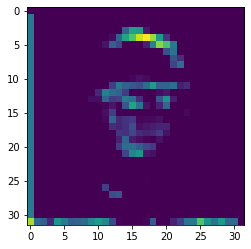

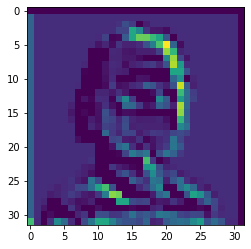

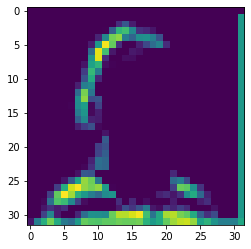

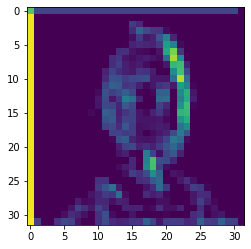

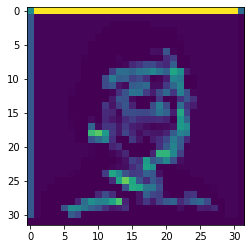

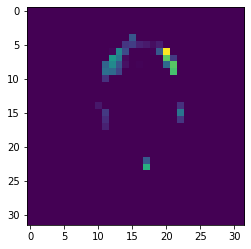

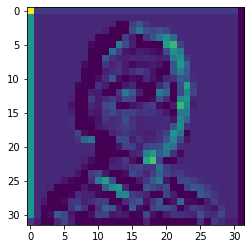

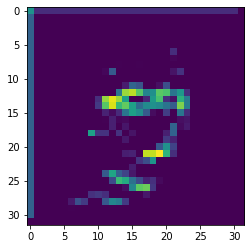

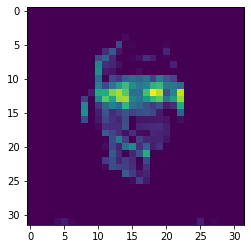

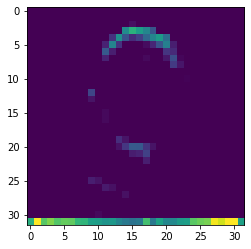

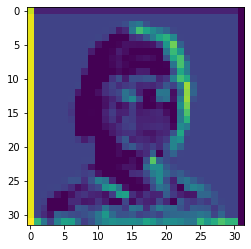

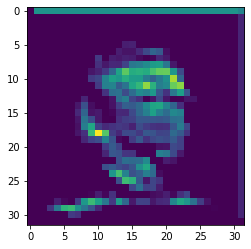

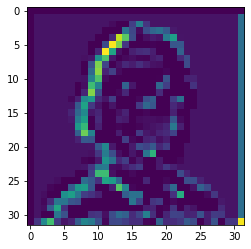

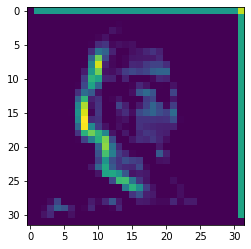

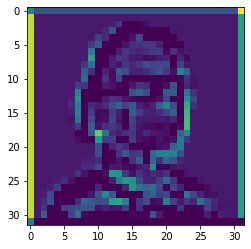

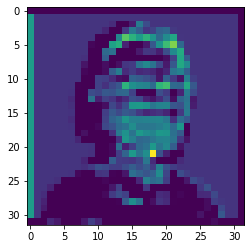

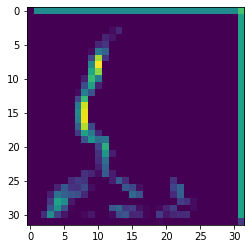

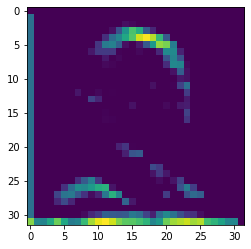

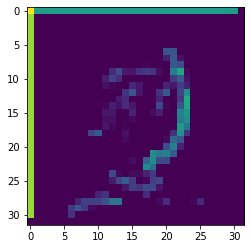

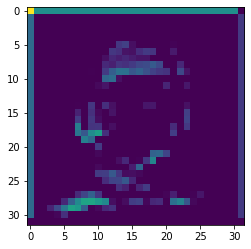

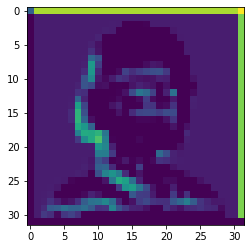

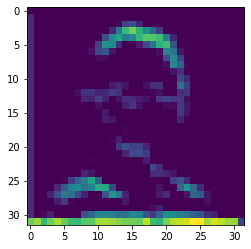

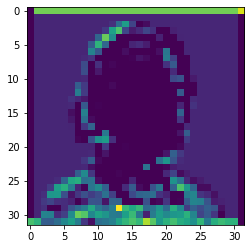

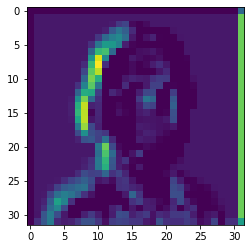

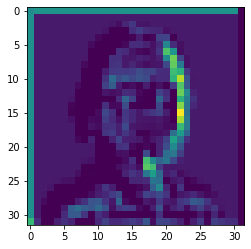

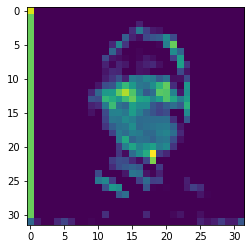

In [45]:
for i in range(0, 32):
    plt.imshow(l0_features[..., i])
    plt.savefig("test"+str(i)+".png")
    plt.show()
    

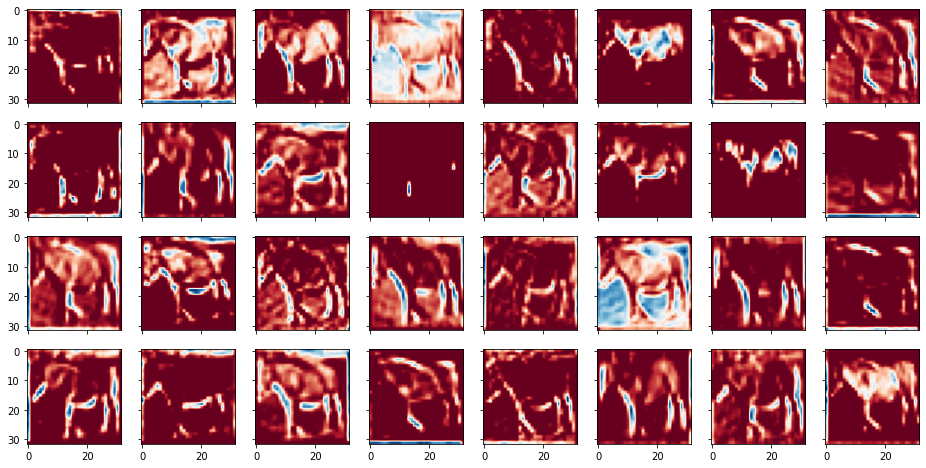

In [20]:
fig, ax = plt.subplots(4, 8, sharex=True, sharey=True, figsize=(16,8))
for i in range(0, 32):
    row, col = i//8, i%8
    #plt.imshow(cv2.cvtColor(lena, cv2.COLOR_BGR2RGB))
    #image = cv2.cvtColor(l0_features[..., i], cv2.COLOR_BGR2RGB)
    ax[row][col].imshow(l0_features[..., i], cmap="RdBu")
plt.show()

In [46]:
#VGG16

In [48]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np

In [54]:
from keras import Input

In [188]:
from numpy import expand_dims

In [49]:
# load model without output layer
model = VGG16(include_top=False)

In [50]:
extractor = tf.keras.Model(inputs=model.inputs,
                           outputs=[layer.output for layer in model.layers])

In [185]:
img =load_img('../nlp/test_image.png',target_size=(224,224))

In [186]:
img =img_to_array(img)

In [189]:
img=expand_dims(img,axis=0)

In [190]:
img =preprocess_input(img)

In [191]:
feature_maps =model.predict(img)

1/1 [==============================] - 1s 555ms/step


In [196]:
feature_maps[0].shape

(1, 224, 224, 64)

In [200]:
len(feature_maps)

5

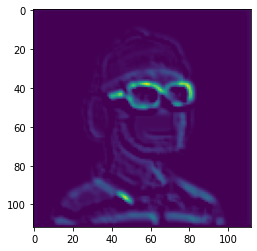

In [203]:
plt.imshow(feature_maps[1][0,:,:,i])

In [209]:
feature_maps[0].shape[-1]-1

63

In [212]:
import os

In [213]:
os.chdir("/Users/user/Desktop/MMAI assignments/Twitter_posts/images")

In [ ]:
os.chdir('/Users/user/Desktop/MMAI assignments/DeepLearning')

In [214]:
pwd

'/Users/user/Desktop/MMAI assignments/Twitter_posts/images'

In [217]:
img.shape

(1, 224, 224, 3)

In [ ]:
cv2.resize(test_image, (32,32), interpolation = cv2.INTER_AREA)

In [221]:
cv2.resize(img,(250,250),interpolation = cv2.INTER_AREA)

array([[   0.     ,    0.     ,    0.     , ...,    0.     ,    0.     ,
           0.     ],
       [   0.     ,    0.     ,    0.     , ...,    0.     ,    0.     ,
           0.     ],
       [   0.     ,    0.     ,    0.     , ...,    0.     ,    0.     ,
           0.     ],
       ...,
       [ 132.30818,  132.30818,  128.21638, ...,  447.93213,  947.73566,
         947.73566],
       [ 494.0531 ,  494.0531 ,  534.69946, ...,  984.71796, 1209.317  ,
        1209.317  ],
       [ 494.0531 ,  494.0531 ,  534.69946, ...,  984.71796, 1209.317  ,
        1209.317  ]], dtype=float32)

In [231]:
cmaps1= ['flag', 'prism', 'ocean', 'gist_earth', 'terrain',
                      'gist_stern', 'gnuplot', 'gnuplot2', 'CMRmap',
                      'cubehelix', 'brg', 'gist_rainbow', 'rainbow', 'jet',
                      'turbo', 'nipy_spectral', 'gist_ncar']

In [232]:
import random

In [236]:
random.choice(cmaps1)

'CMRmap'

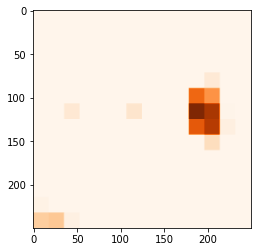

In [230]:
plt.imshow(save_img,cmap=cmaps1[4])


0


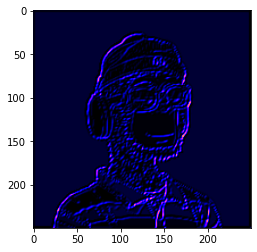

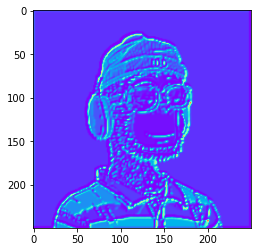

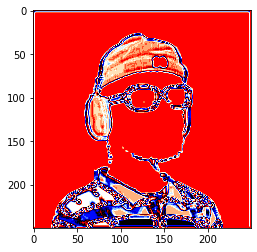

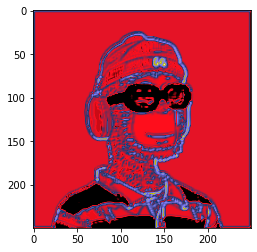

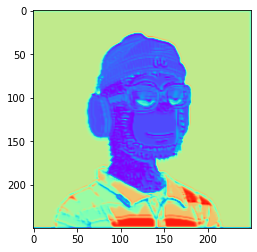

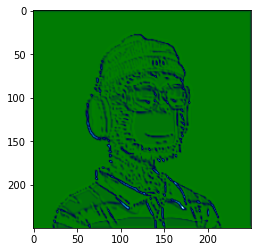

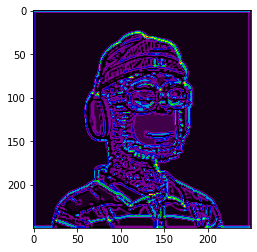

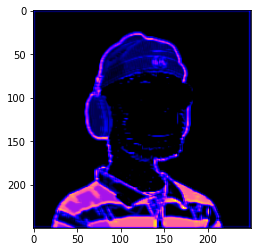

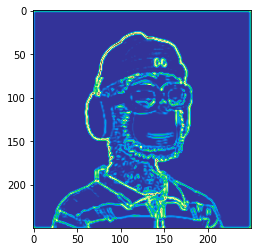

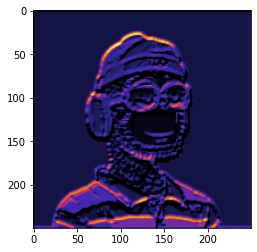

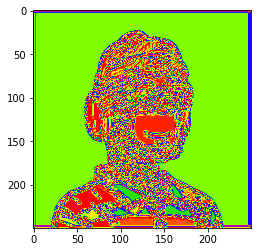

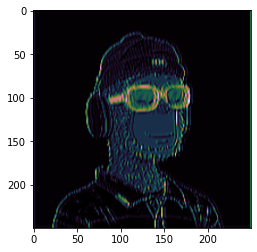

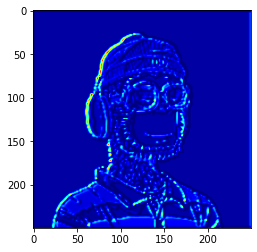

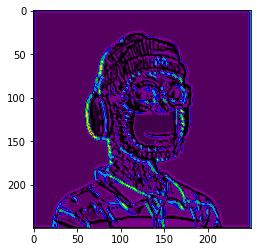

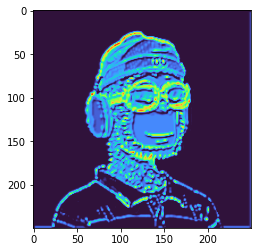

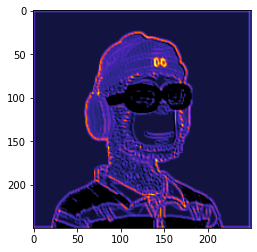

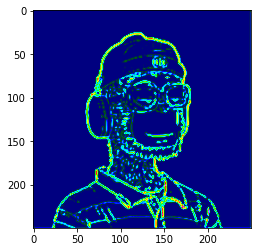

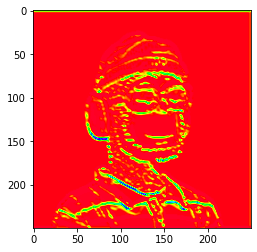

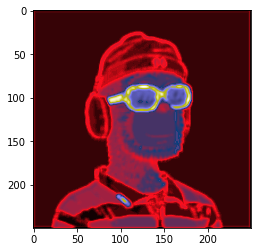

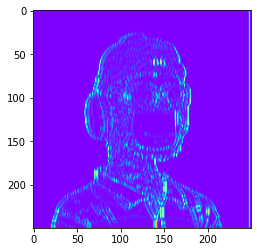

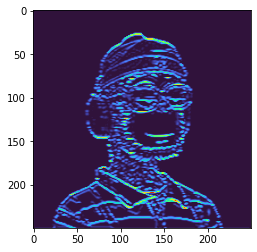

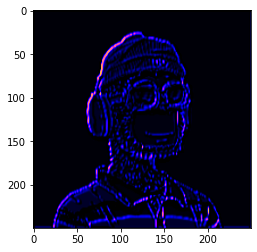

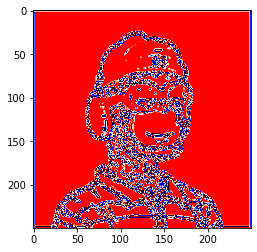

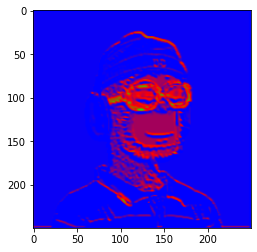

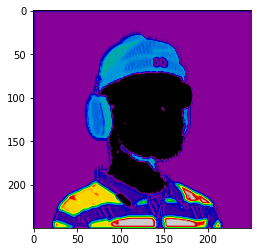

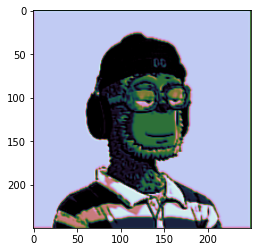

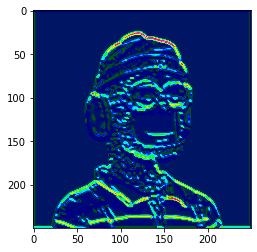

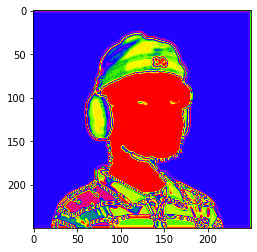

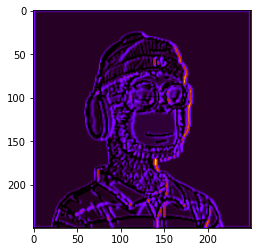

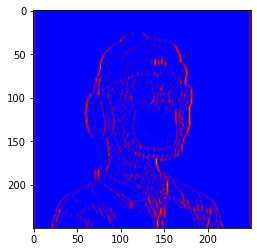

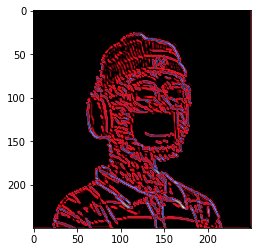

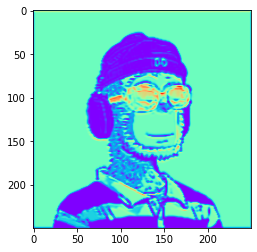

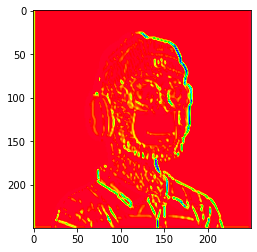

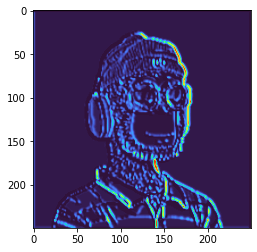

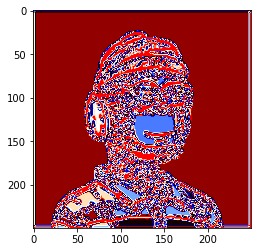

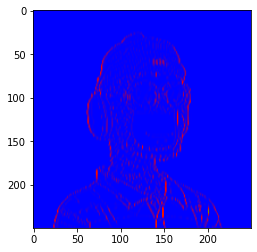

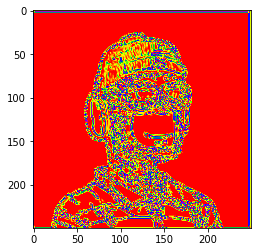

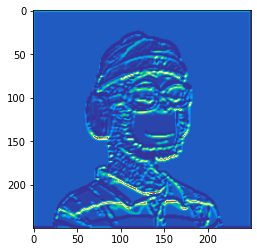

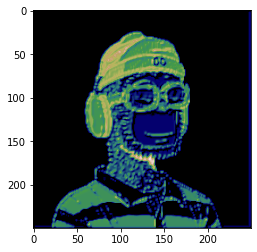

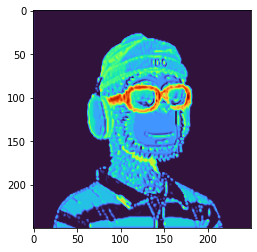

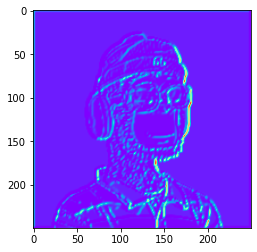

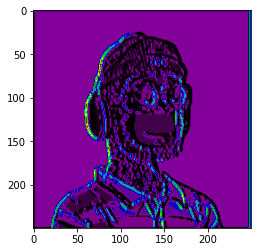

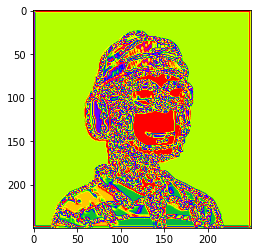

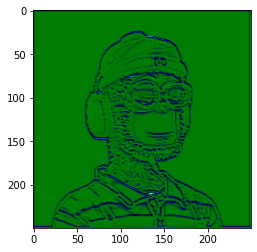

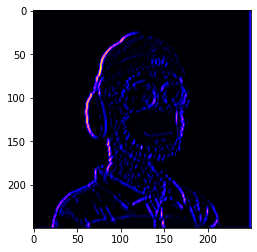

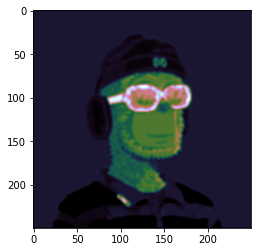

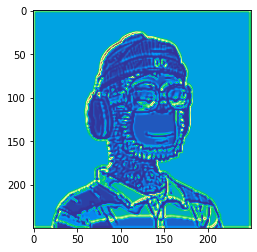

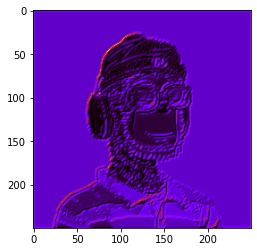

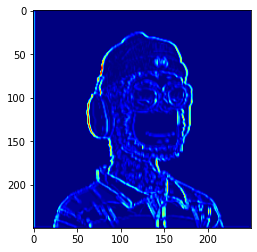

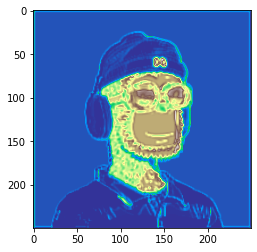

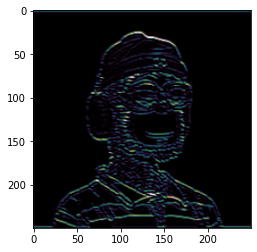

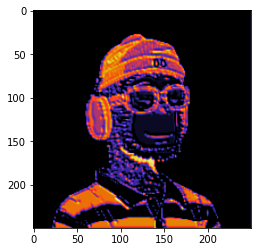

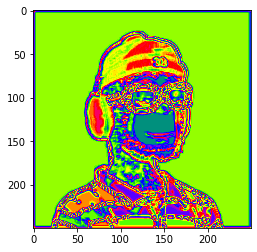

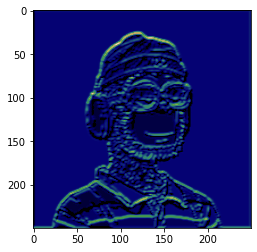

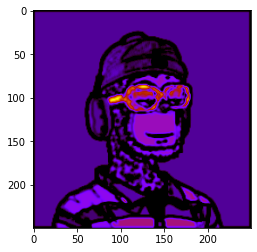

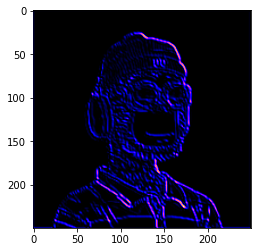

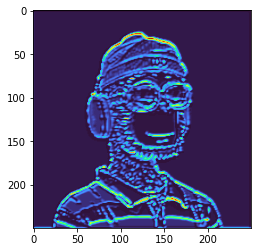

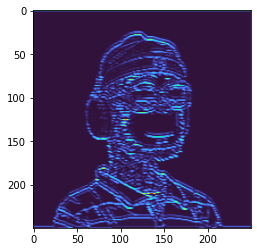

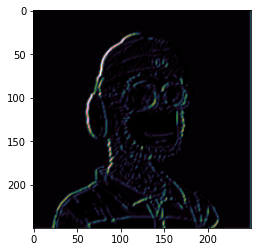

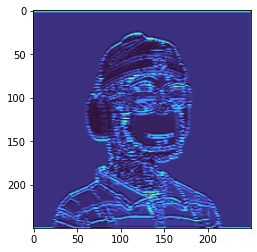

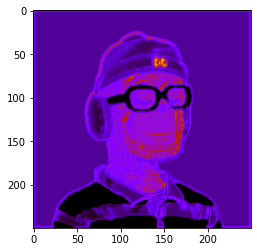

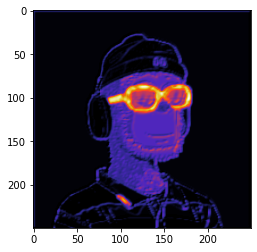

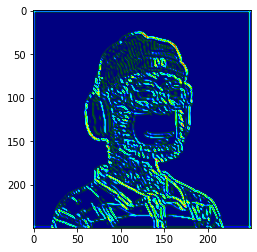

1


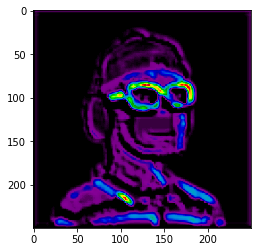

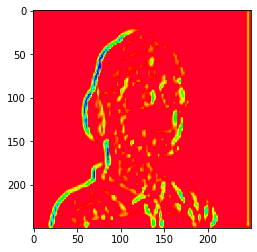

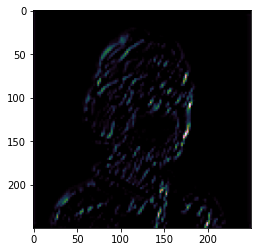

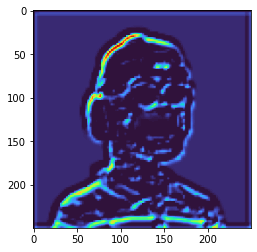

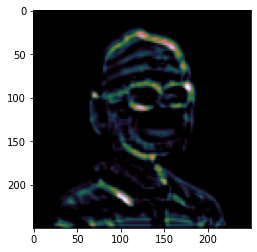

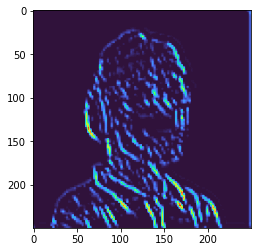

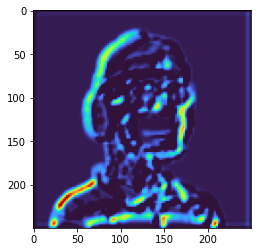

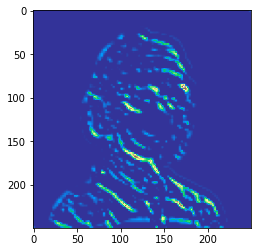

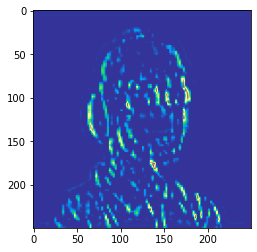

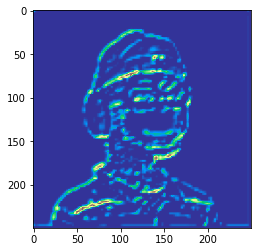

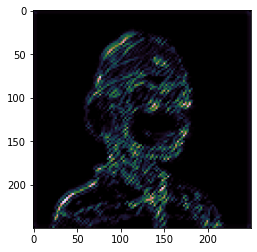

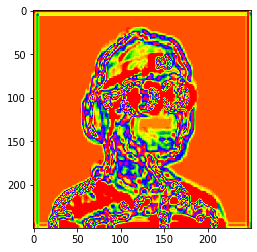

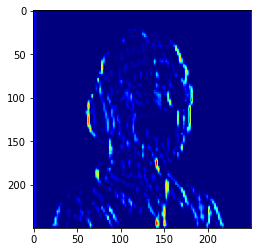

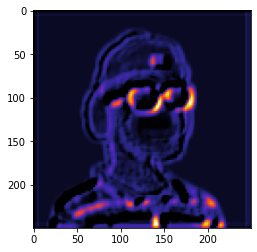

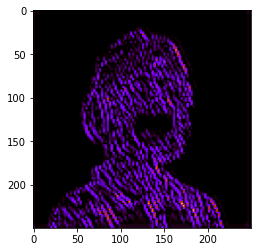

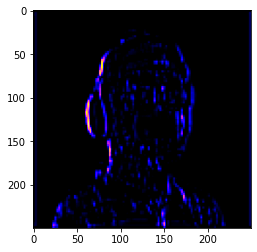

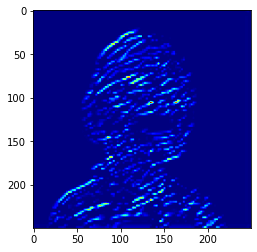

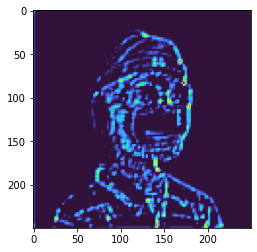

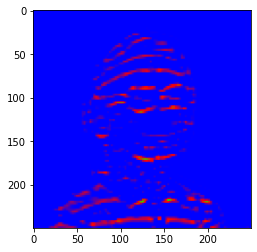

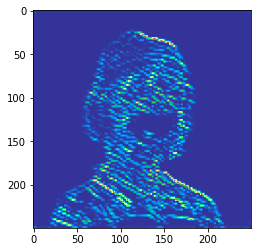

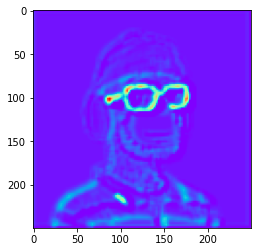

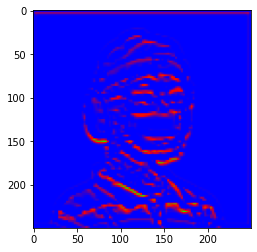

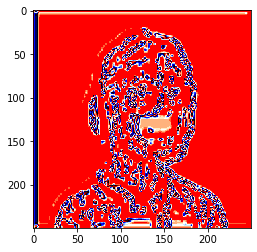

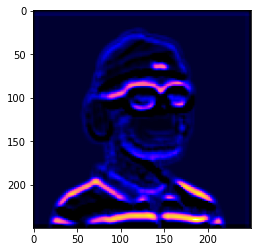

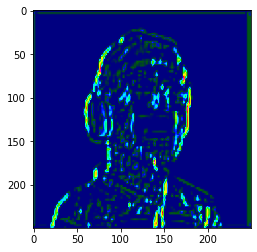

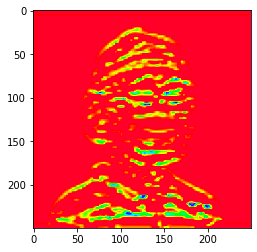

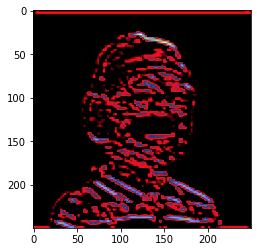

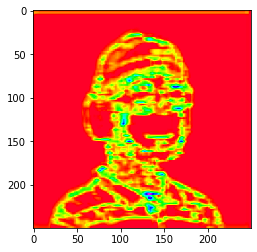

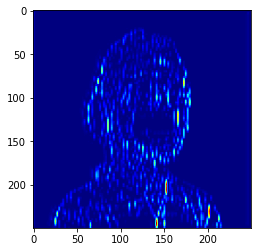

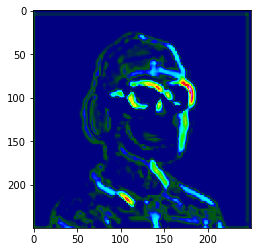

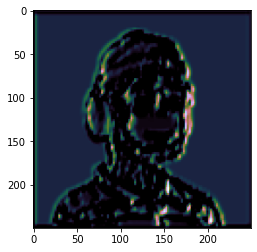

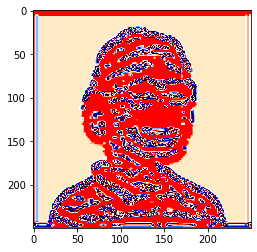

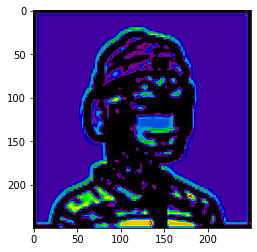

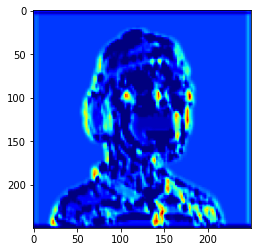

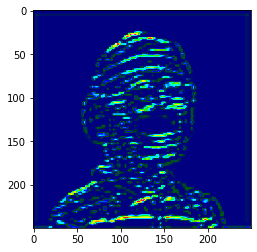

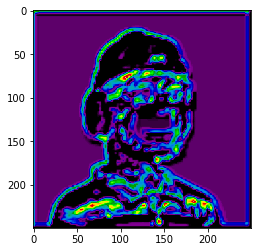

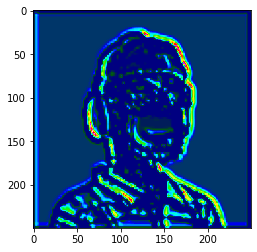

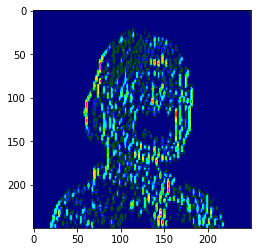

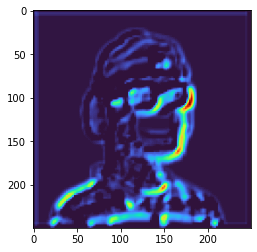

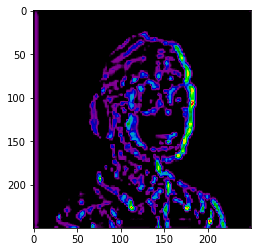

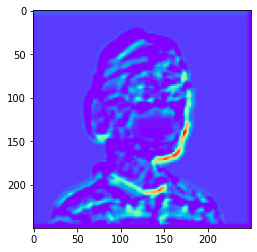

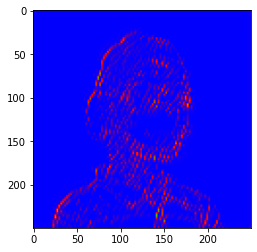

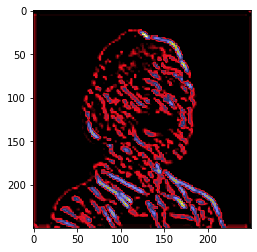

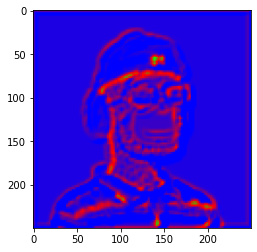

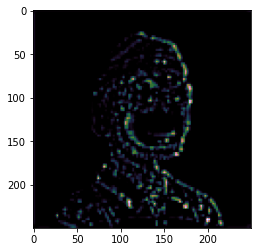

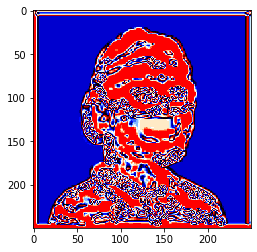

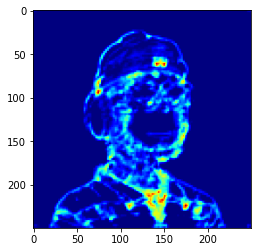

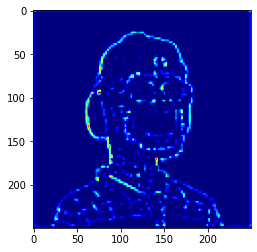

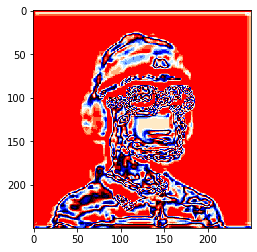

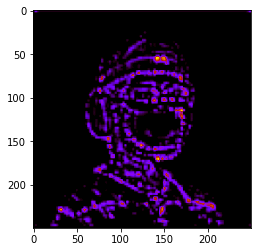

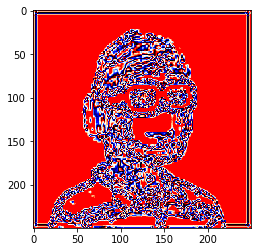

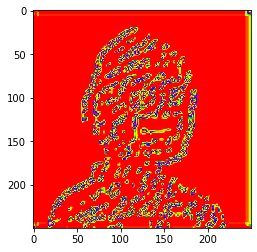

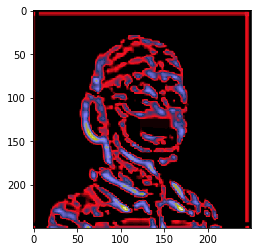

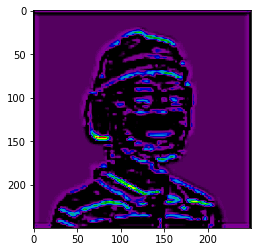

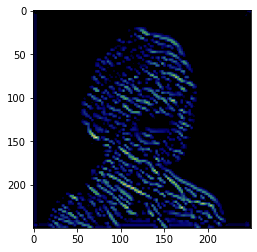

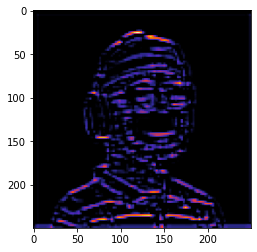

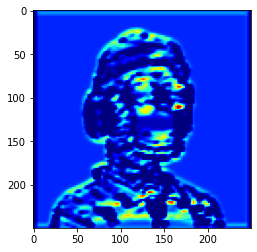

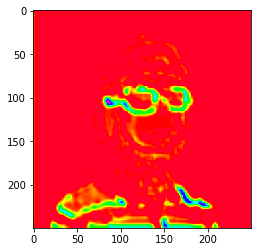

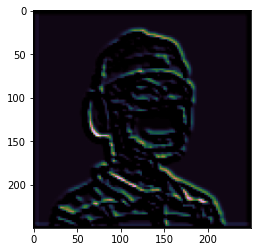

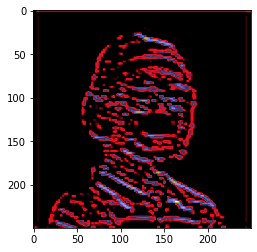

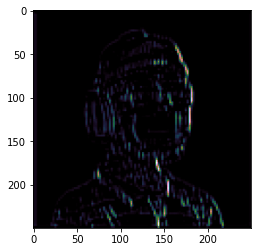

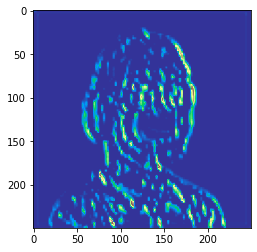

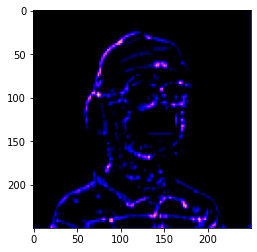

2


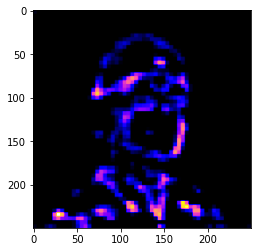

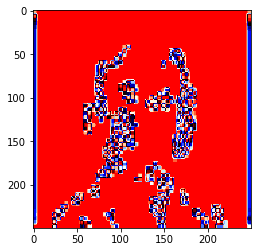

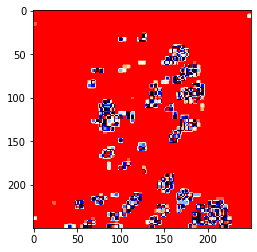

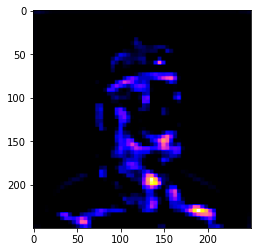

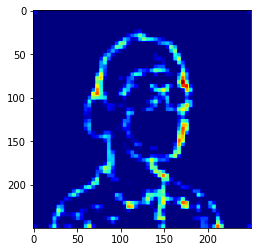

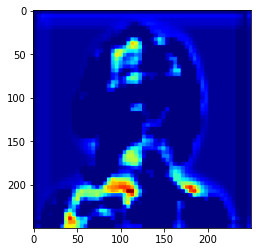

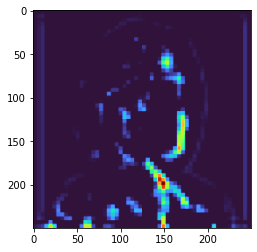

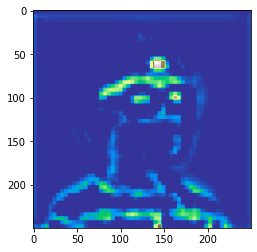

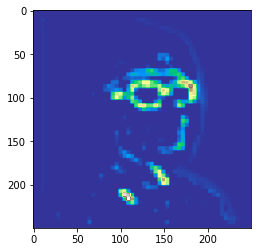

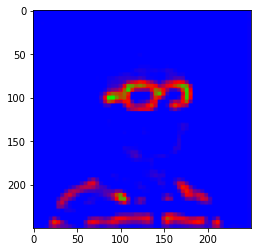

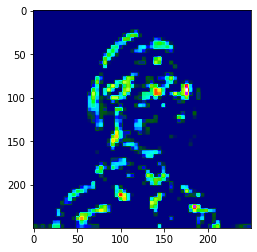

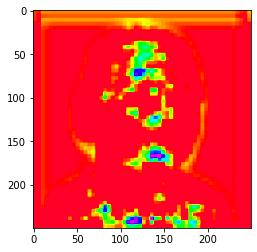

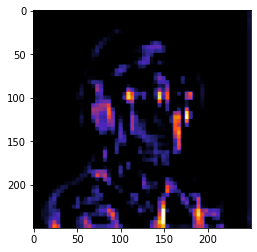

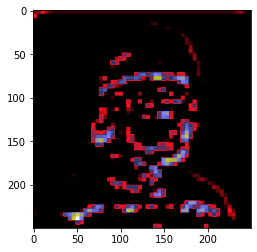

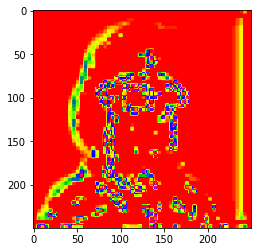

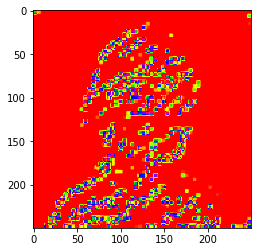

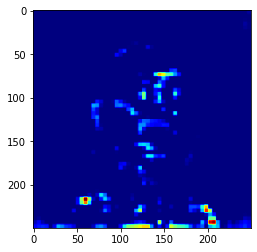

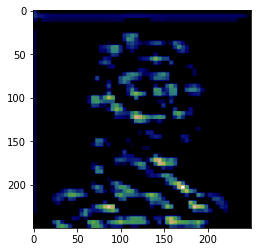

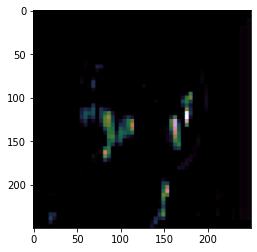

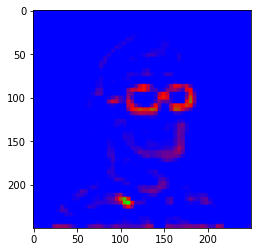

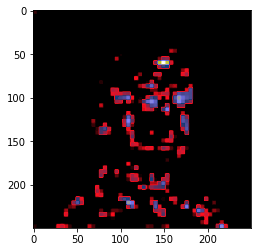

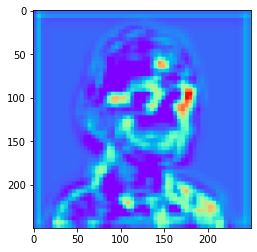

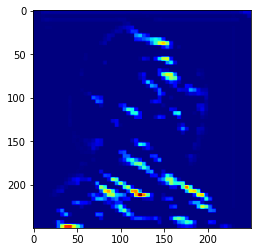

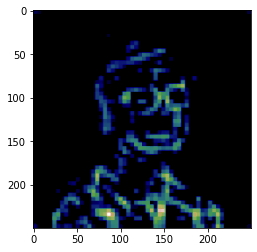

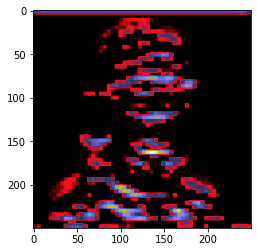

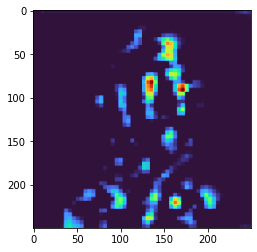

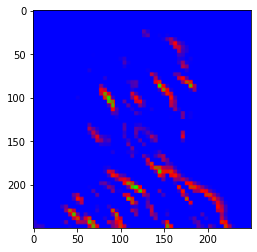

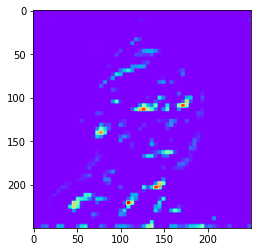

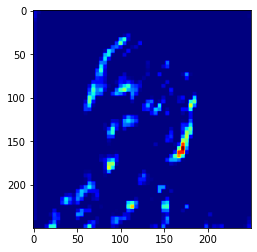

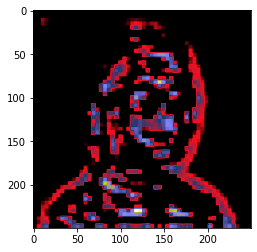

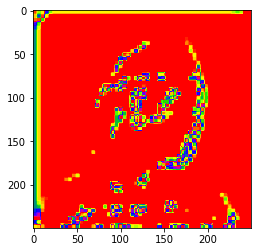

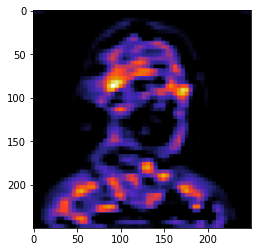

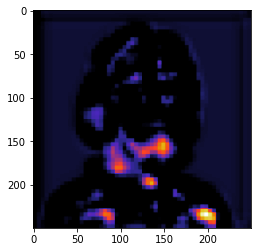

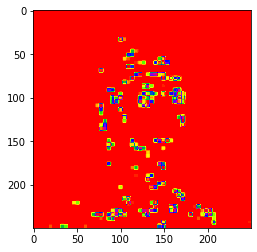

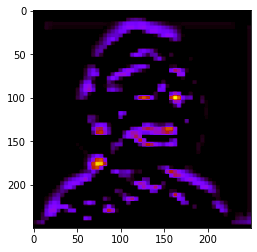

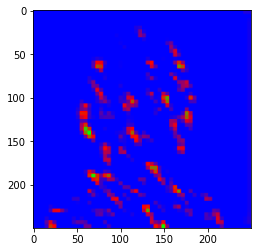

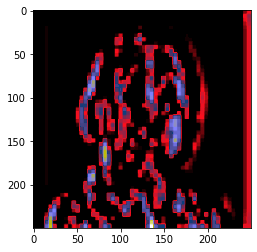

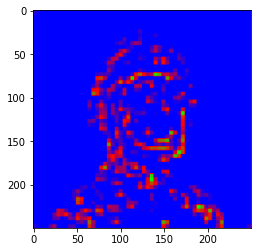

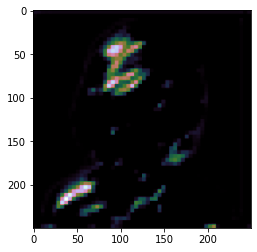

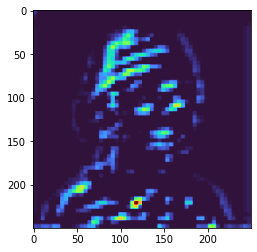

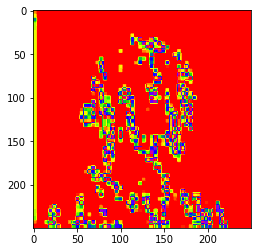

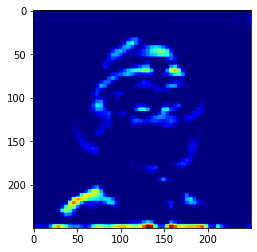

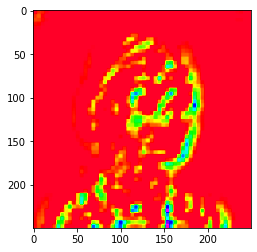

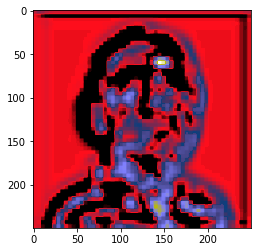

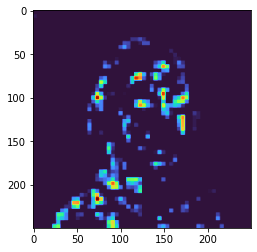

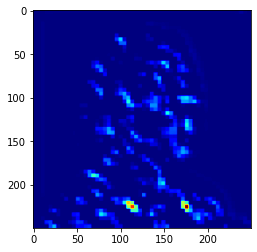

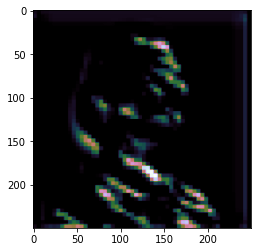

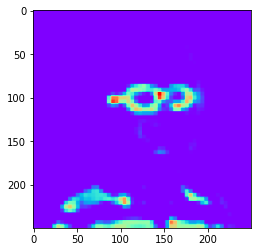

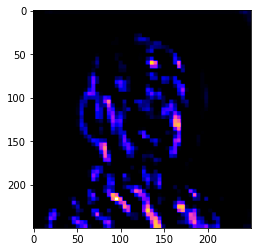

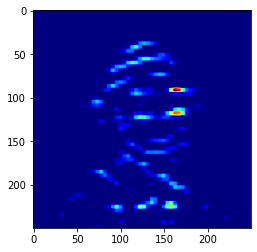

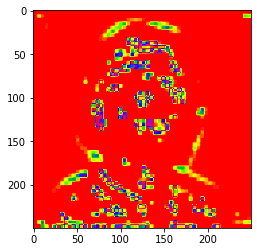

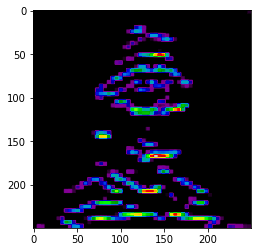

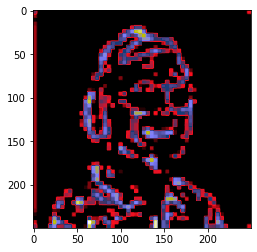

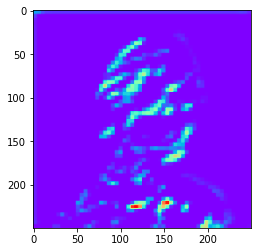

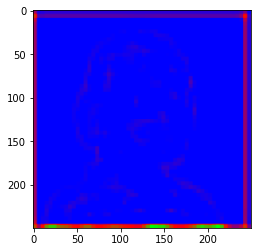

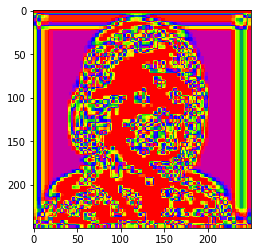

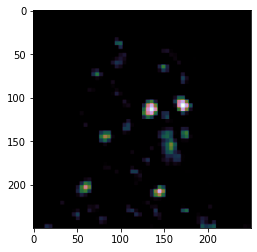

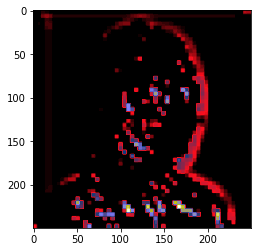

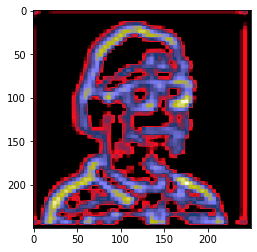

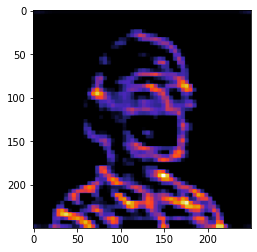

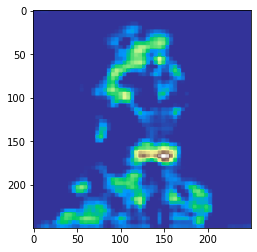

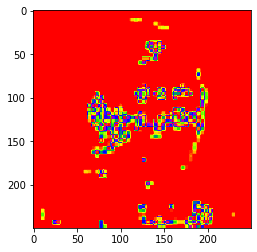

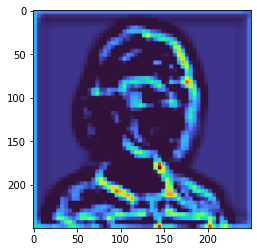

3


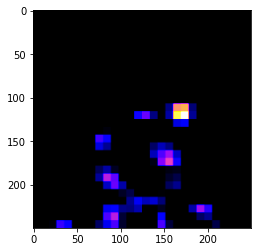

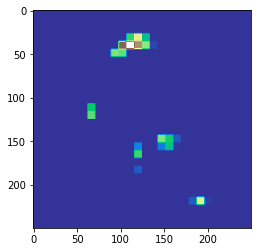

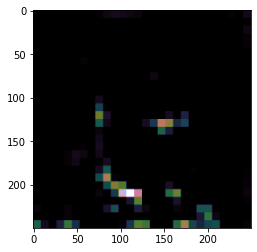

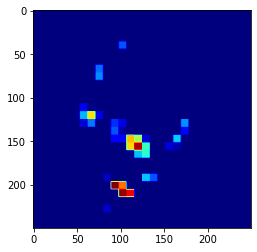

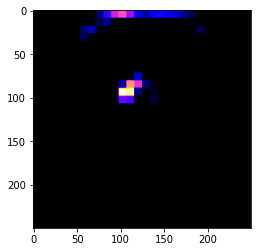

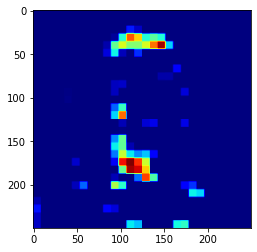

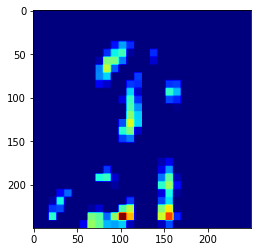

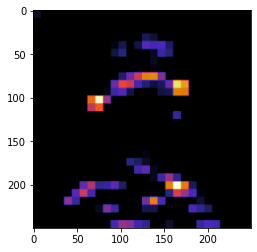

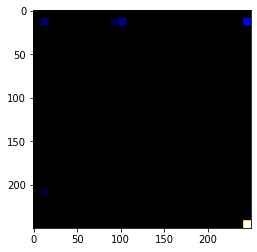

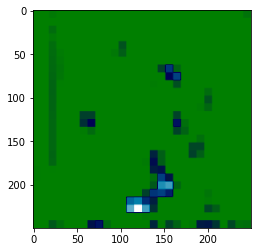

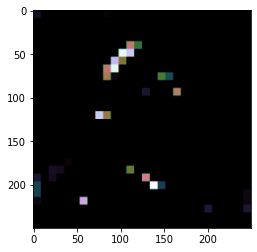

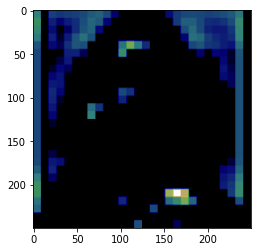

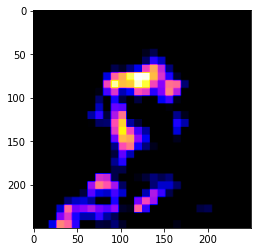

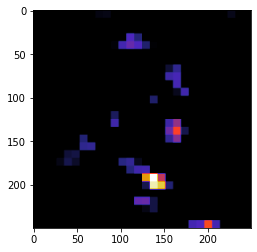

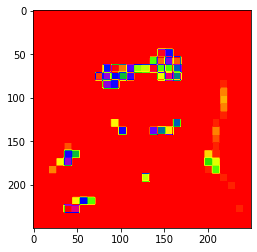

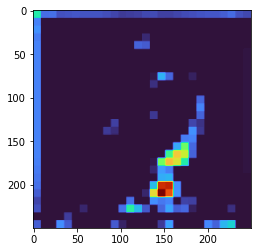

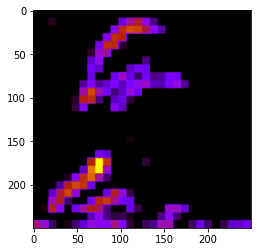

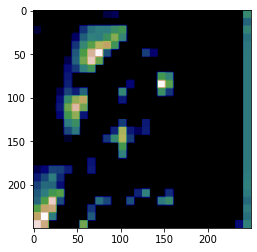

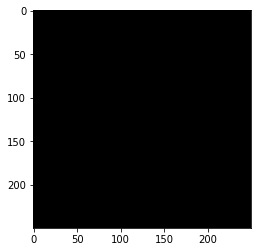

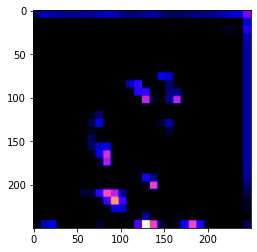

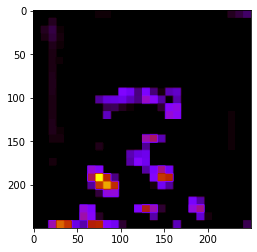

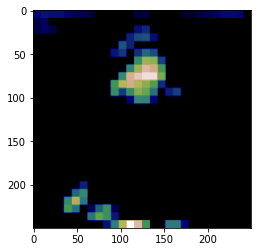

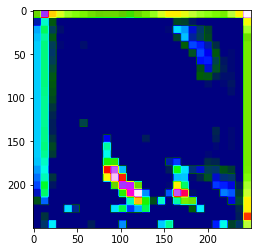

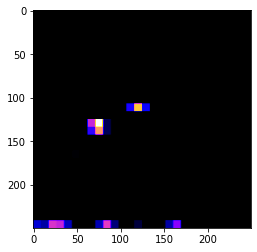

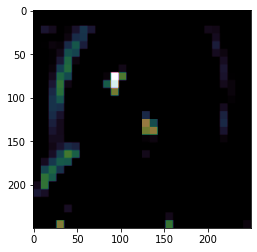

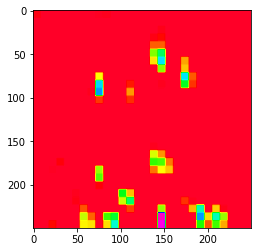

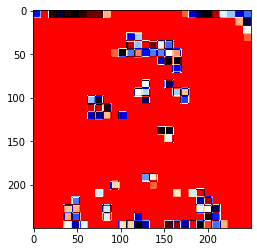

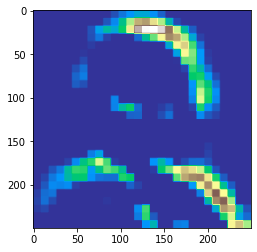

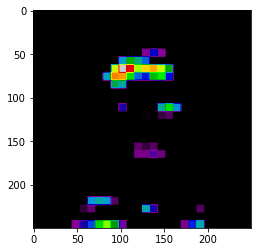

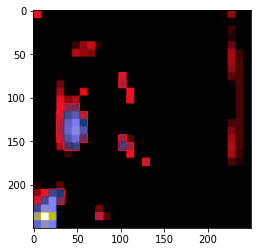

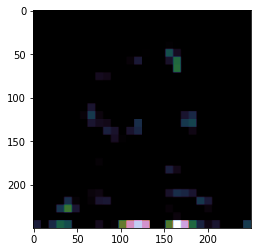

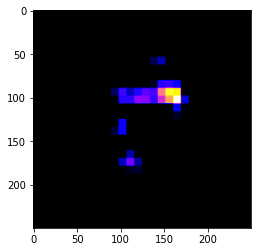

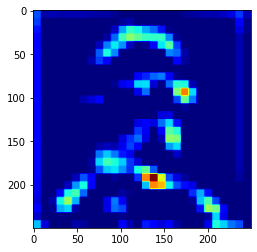

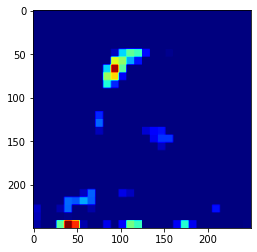

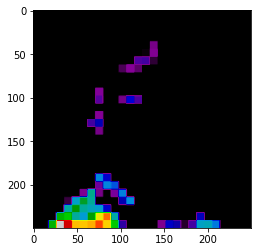

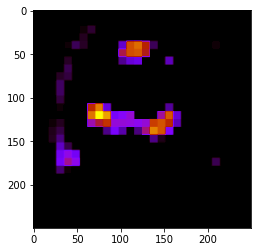

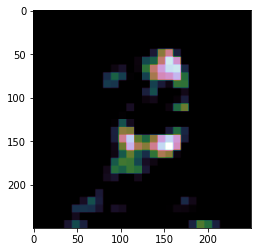

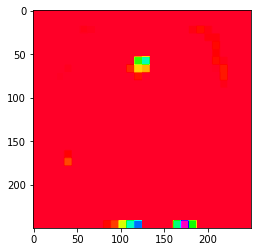

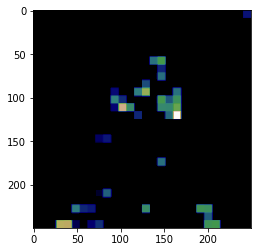

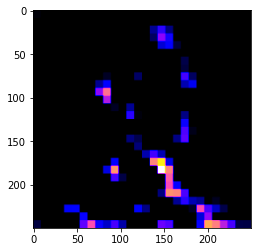

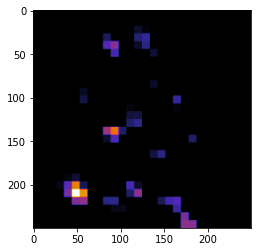

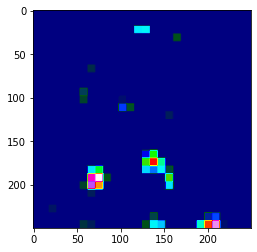

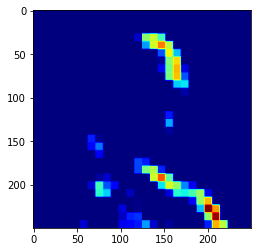

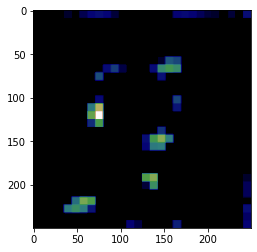

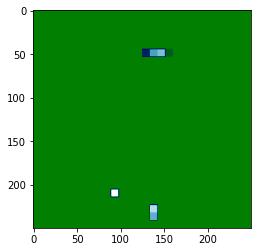

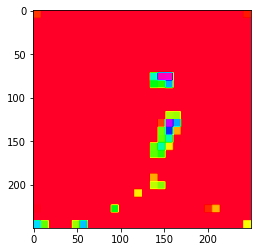

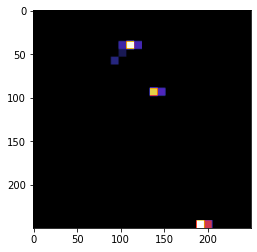

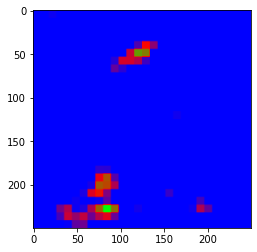

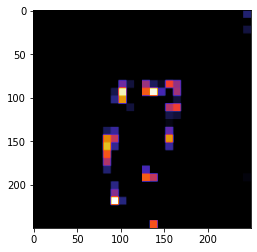

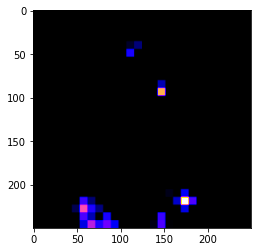

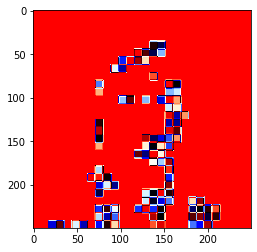

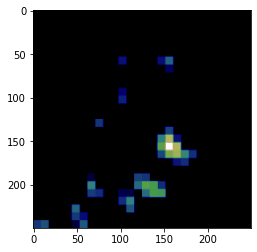

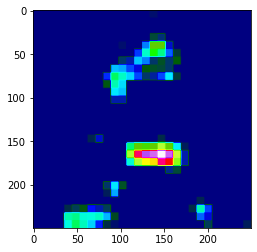

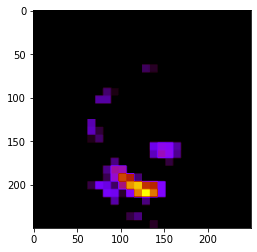

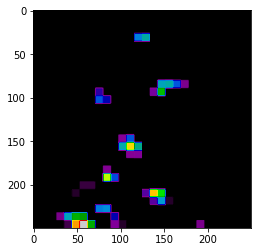

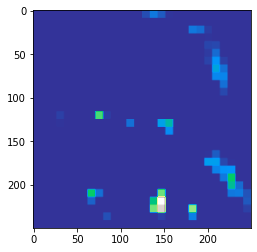

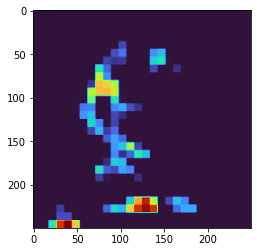

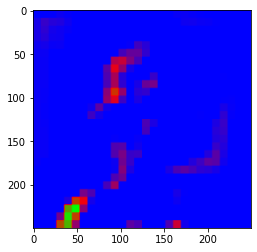

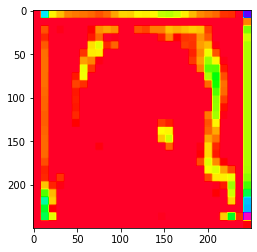

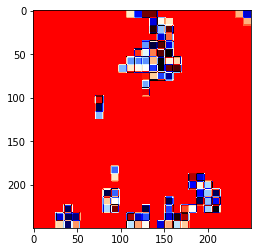

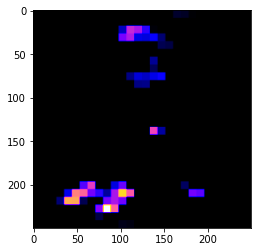

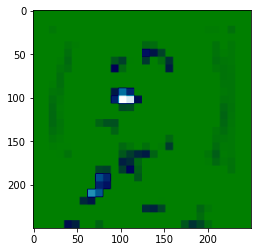

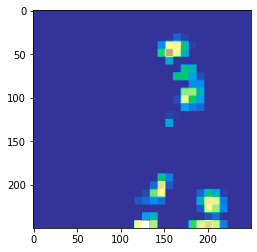

4


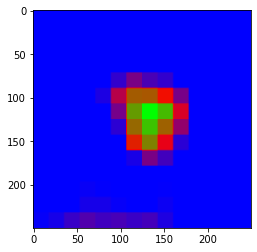

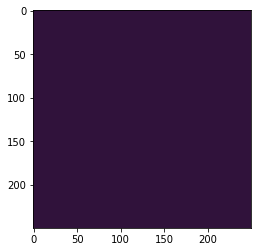

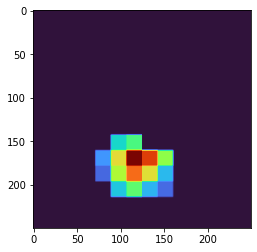

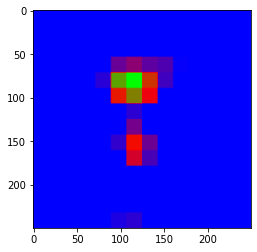

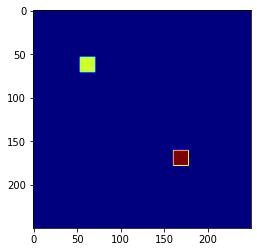

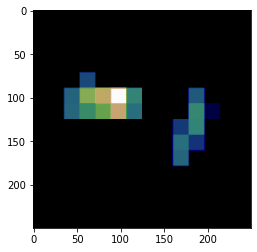

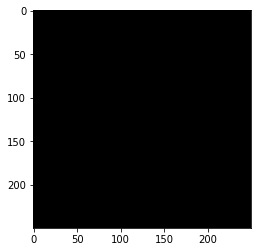

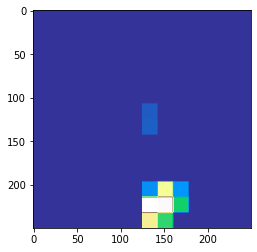

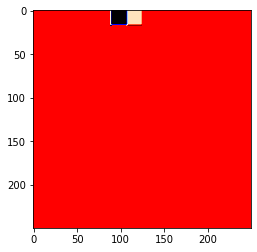

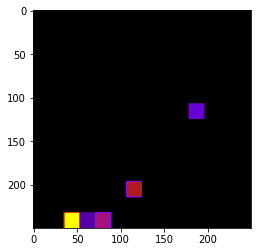

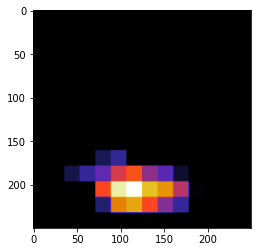

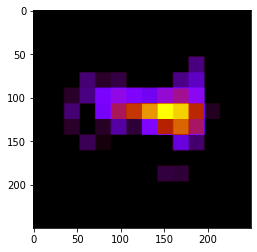

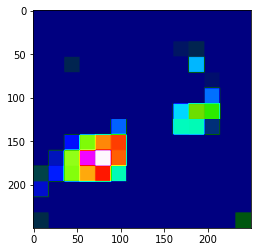

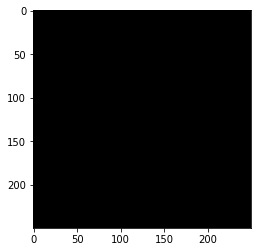

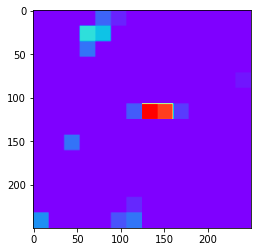

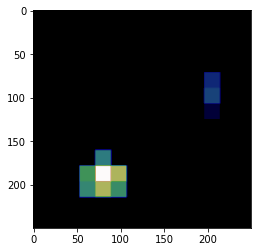

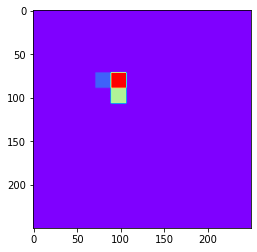

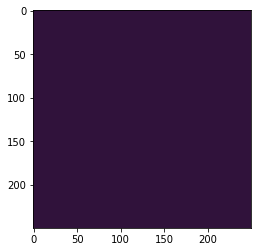

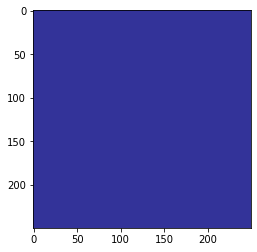

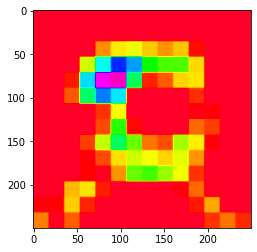

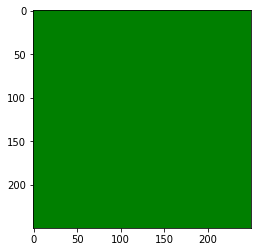

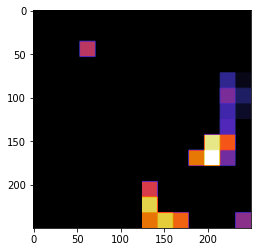

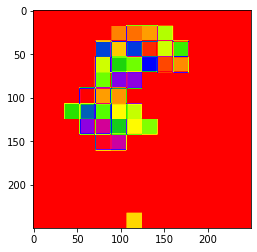

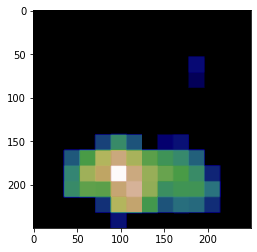

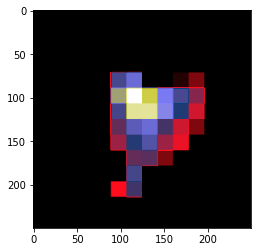

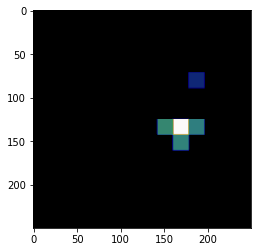

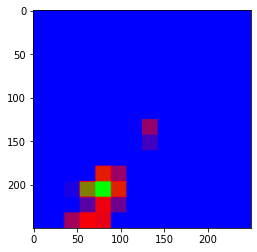

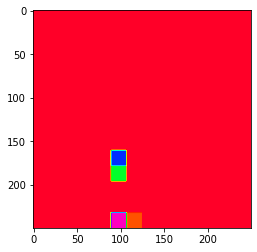

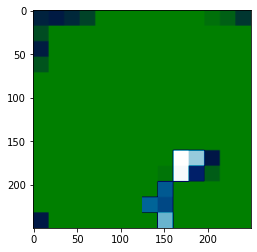

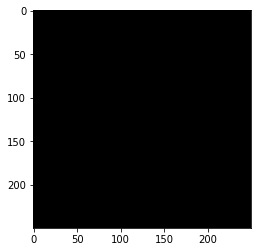

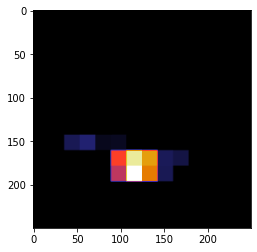

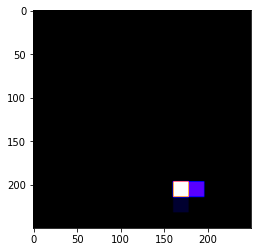

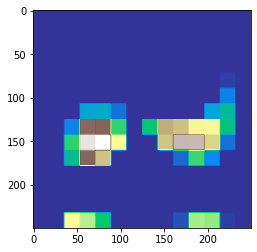

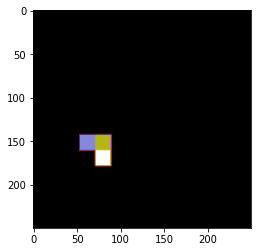

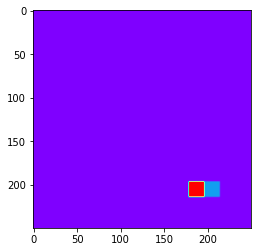

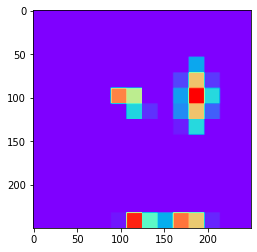

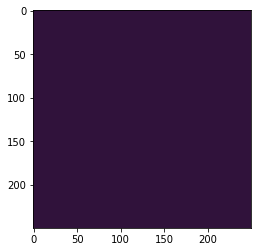

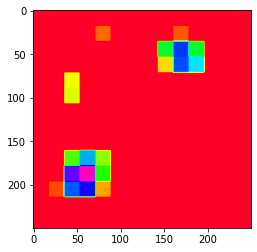

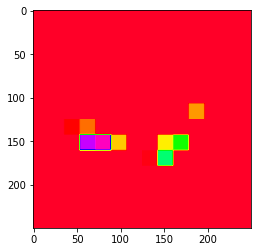

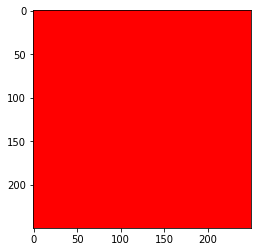

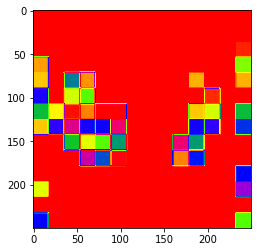

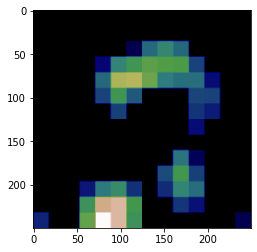

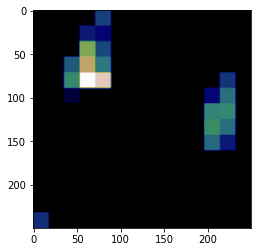

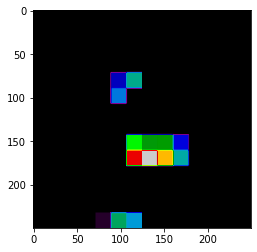

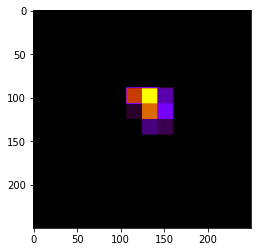

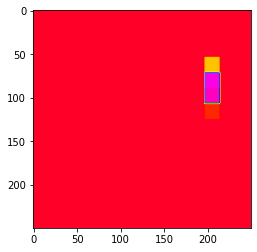

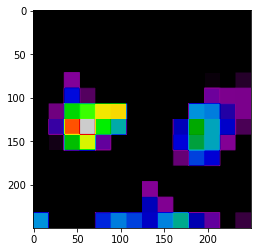

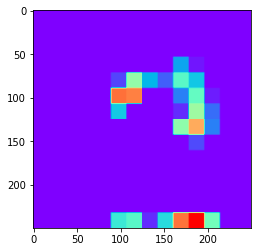

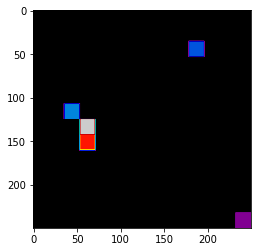

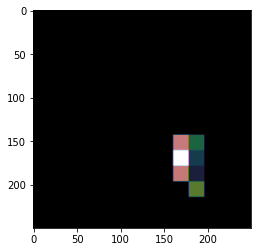

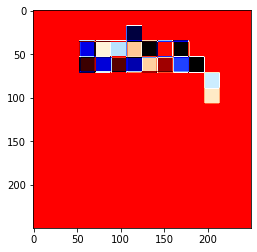

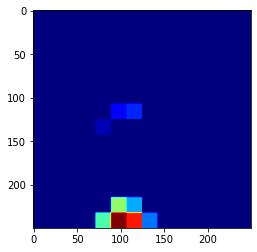

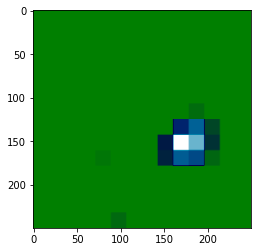

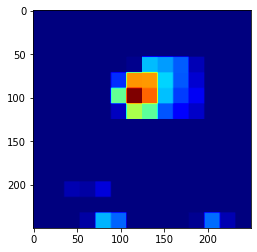

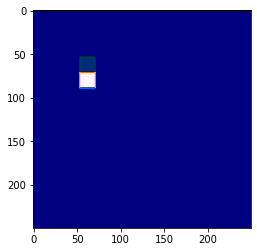

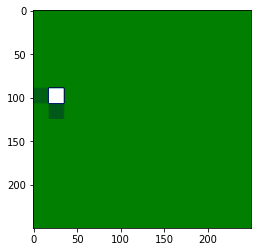

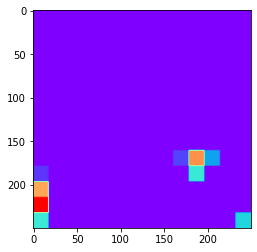

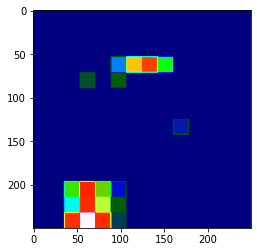

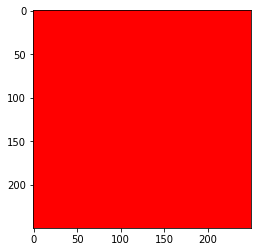

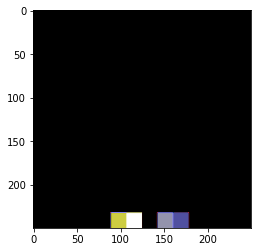

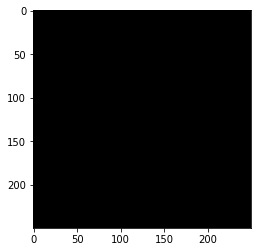

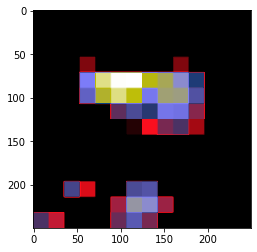

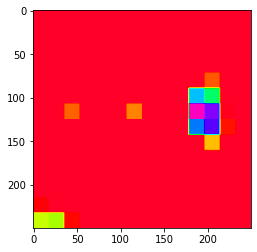

In [237]:
os.chdir("/Users/user/Desktop/MMAI assignments/Twitter_posts/images")
n=0
for fmap in range(len(feature_maps)):
    print(fmap)
    for i in range(feature_maps[0].shape[-1]-1):
        save_img = cv2.resize(feature_maps[fmap][0,:,:,i],(250,250),interpolation = cv2.INTER_AREA)
        plt.imshow(save_img,random.choice(cmaps1))
        plt.savefig("twitter_"+ str(n))
        n+=1
        plt.show()

os.chdir('/Users/user/Desktop/MMAI assignments/DeepLearning')

In [ ]:

    i

In [56]:
new_input_vgg16 = Input(shape=(640, 480, 3))
model = VGG16(include_top=False, input_tensor=new_input_vgg16)

In [57]:
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 640, 480, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 640, 480, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 640, 480, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 320, 240, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 320, 240, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 320, 240, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 160, 120, 128)     0     

In [62]:
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16

In [63]:
image = load_img('../nlp/test_image.png', target_size=(224, 224))
# convert the image pixels to a numpy array
image = img_to_array(image)
# reshape data for the model
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
# prepare the image for the VGG model
image = preprocess_input(image)

In [65]:
image.shape

(1, 224, 224, 3)

In [74]:
image.reshape(224, 224, 3).shape

(224, 224, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


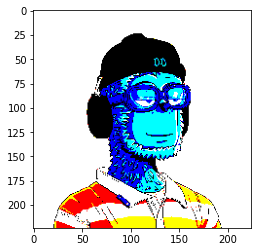

In [75]:
plt.imshow(image.reshape(224, 224, 3))

In [77]:
image = load_img('../nlp/test_image.png', target_size=(224, 224))
# convert the image pixels to a numpy array
image = img_to_array(image)
# reshape data for the model
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
# prepare the image for the VGG model
image = preprocess_input(image)
# load the model
model = VGG16()
# predict the probability across all output classes
yhat = model.predict(image)
# convert the probabilities to class labels
label = decode_predictions(yhat)
# retrieve the most likely result, e.g. highest probability
label = label[0][0]
# print the classification
print('%s (%.2f%%)' % (label[1], label[2]*100))

35363/35363 [==============================] - 0s 0us/step
ski_mask (34.33%)


In [78]:
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten

In [174]:
model = VGG16()

In [175]:
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [180]:
ixs =[2,5,9,13,17]

In [183]:
outputs =[model.layers[i].output for i in ixs]

In [184]:
model=Model(inputs=model.inputs, outputs=outputs)

In [79]:
# example of tending the vgg16 model
# load model without classifier layers
model = VGG16(include_top=False, input_shape=(300, 300, 3))
# add new classifier layers
flat1 = Flatten()(model.layers[-1].output)
class1 = Dense(1024, activation='relu')(flat1)
output = Dense(10, activation='softmax')(class1)
# define new model
model = Model(inputs=model.inputs, outputs=output)

model.summary()


Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 300, 300, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 300, 300, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 300, 300, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 150, 150, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 150, 150, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 150, 150, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 75, 75, 128)       0   

In [91]:
extractor = tf.keras.Model(inputs=model.inputs,
                           outputs=[layer.output for layer in model.layers])

In [92]:
img_example =load_img('../nlp/test_image.png', target_size=(300, 300))

In [93]:
features = extractor(np.expand_dims(img_example,0))

In [88]:
[layer.output for layer in model.layers]

[<KerasTensor: shape=(None, 300, 300, 3) dtype=float32 (created by layer 'input_7')>,
 <KerasTensor: shape=(None, 300, 300, 64) dtype=float32 (created by layer 'block1_conv1')>,
 <KerasTensor: shape=(None, 300, 300, 64) dtype=float32 (created by layer 'block1_conv2')>,
 <KerasTensor: shape=(None, 150, 150, 64) dtype=float32 (created by layer 'block1_pool')>,
 <KerasTensor: shape=(None, 150, 150, 128) dtype=float32 (created by layer 'block2_conv1')>,
 <KerasTensor: shape=(None, 150, 150, 128) dtype=float32 (created by layer 'block2_conv2')>,
 <KerasTensor: shape=(None, 75, 75, 128) dtype=float32 (created by layer 'block2_pool')>,
 <KerasTensor: shape=(None, 75, 75, 256) dtype=float32 (created by layer 'block3_conv1')>,
 <KerasTensor: shape=(None, 75, 75, 256) dtype=float32 (created by layer 'block3_conv2')>,
 <KerasTensor: shape=(None, 75, 75, 256) dtype=float32 (created by layer 'block3_conv3')>,
 <KerasTensor: shape=(None, 37, 37, 256) dtype=float32 (created by layer 'block3_pool')>,
